# How does follower count, retweets, and state of origin influence overall engagement?(number of likes)


## Introduction

## Data Cleaning

In [40]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')

In [4]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [7]:

df_final = df.sample(frac = 0.10)
df_final.shape

(97092, 21)

In [6]:
df_final.isnull().any(axis = 0)

created_at              False
tweet_id                False
tweet                   False
likes                   False
retweet_count           False
source                   True
user_id                 False
user_name                True
user_screen_name        False
user_description         True
user_join_date          False
user_followers_count    False
user_location            True
lat                      True
long                     True
city                     True
country                  True
continent                True
state                    True
state_code               True
collected_at            False
dtype: bool

In [5]:
df_final.duplicated().sum()

0

In [8]:

df_cleaned = df_final.dropna()
df_cleaned.shape

(18866, 21)

## Summary statistics

In [41]:
# y variable stats
likes_summary = df_cleaned['likes'].describe()
likes_summary

count    18785.000000
mean        11.177109
std        191.985022
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      17009.000000
Name: likes, dtype: float64

Interpretation of likes summary table:
based on the interquartile range, 50% data points for number of likes are between 0-2. This is in stark contrast to the mean which is much higher at 11.177. The most striking is that the standard deviation is 191 which is more than 10 times bigger than the mean itself. Such a massive standard deviation given our mean and interquartile range implies the presence of extreme outliers, which are severely skewing the data. Based on our max value, it is clear that there is a massive right skew in our likes distribution. this is interesting as it implies that a very small number of posts produce a disproportionately high number of likes from a likes share point of view.

In [45]:
#x1 variable (follower count)
follower_summary = df_cleaned['user_followers_count'].describe()
follower_summary

count    1.878500e+04
mean     3.134652e+04
std      2.581124e+05
min      0.000000e+00
25%      1.960000e+02
50%      8.970000e+02
75%      3.324000e+03
max      1.320599e+07
Name: user_followers_count, dtype: float64

Interpretation of follower summary table
the interquartile range suggests that 50% of all values fall within 196 to 3,324 followers. The mean follower count is 31,346 with the standard deviation being 258,112. This implies that like the previous summary, there are outliers that lead to a large standard deviation and mean, despite most values being within 196 and 3,324. Like before, there is a big right skew implying that there are a few accounts in the dataset that have a disproportionately high share of followers. 

In [46]:
#x2  variable (retweet count)
retweet_summary = df_cleaned['retweet_count'].describe()
retweet_summary

count    18785.000000
mean         2.683524
std         52.618913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5135.000000
Name: retweet_count, dtype: float64

interpretation of retweet summary table
Similar to our previous tables, we can see a clear case of an extreme right skew. 50% of all values are zero, but the mean retweet count is around 3 with a massive standard deviation of 52. The max number being 5135 provides an explanation for why the standard deviation is so high.

To conclude from our summary statistics, It is clear that we have to look at the small number of highly influential data points as oppoed to the majority number of non-influential data points. We can also even out the skewed distributions using a log scale and make interpretations on that basis. 

# Plots, Histograms, Figures

(0.0, 3000000.0)

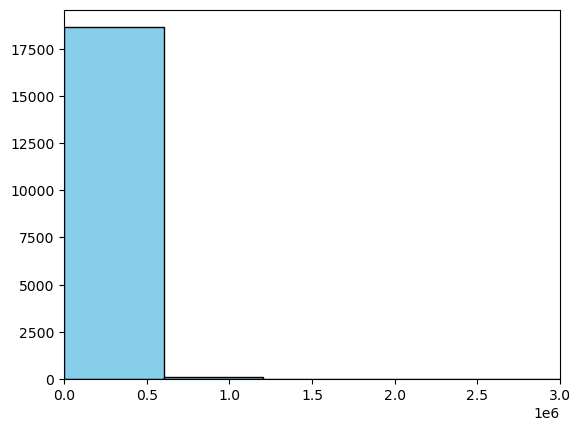

In [10]:
plt.hist(df_cleaned['user_followers_count'], bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])

The following is the plot for follower count. As was clear in the summary tables, majority of followers range between 0 to 500,000. We considered two main options which was filtering out the no-influential data and keeping the outliers versus using a log scale to even out the distribution. Let us apply a log transformation on follower count and plot the corresponding histogram.

(0.0, 3000000.0)

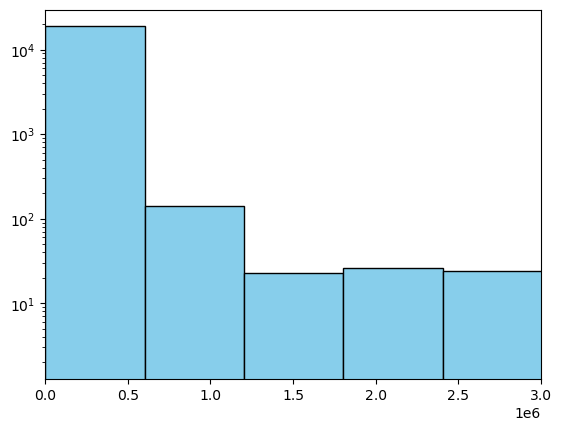

In [44]:
#histogram of followers count
plt.hist(df_cleaned['user_followers_count'],log = True, bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])
#if we used linear scale, there would be only one bar (follower count between 0 to 5 500,000 followers).
# log scale spreads the distribution out


Use of log scale
- when we are focused on measuring 'relative changes' we use the log scale. When we are focused on Absolute changes we use the linear scale
eg: stock A goes from 1 to 1.10, stock B goes from 100 to 110. This implies a 10% increase for both parts(same relative change) but different absolute change(0.10 and 10). What a log scale does is convert the relative percent change into an absolute change
for stock A: 0 to 0.413 
for stock B: 2 to 2.413

As we can see, the histogram does prove to be less skewed when we take log follower count. This is because the log function compresses larger values more than it does smaller values. Thus, the outliers to the right (very large values) are compressed such that the absolute change in log values between the small and large numbers are lesser. The relative percent difference in large and small numbers is represented still by absolute change in log values so that information is not lost. We can use the absolute changes, thus, to get an understanding of how percent change in follower count influences engagement (likes).


(0.0, 10000.0)

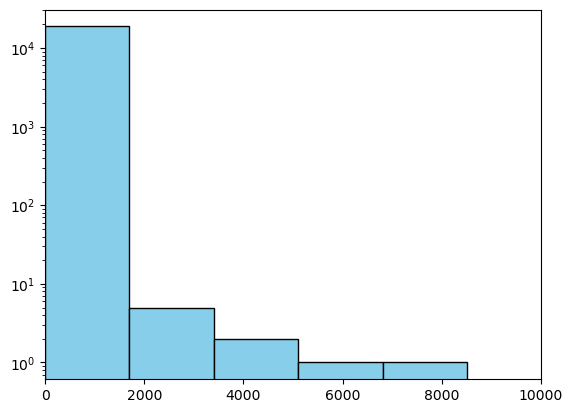

In [43]:
#histogram of likes count
plt.hist(df_cleaned['likes'],log= True, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,10000])
#used log-scale again for similar purposes.


This is a histogram for the number of likes. Like before, a log scale has been applied to correct the skew and make analysis easier. 

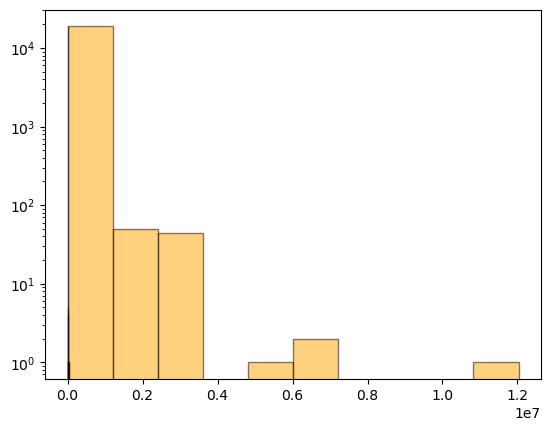

In [19]:
plt.hist(df_cleaned['user_followers_count'],log = True, alpha = 0.5, edgecolor = 'black', color = 'orange', label = 'followers')
plt.hist(df_cleaned['likes'],log= True, alpha = 0.5, edgecolor = 'black', color = 'red', label = 'likes')
plt.show()

In [43]:
#limiting state values to top 10
state_freq = df_cleaned['state'].value_counts()
sorted_series = state_freq.sort_values(ascending = False)
sorted_series.head(10)

state
New York                1923
California              1814
England                 1612
District of Columbia     960
Ile-de-France            881
Texas                    714
Florida                  603
Ontario                  562
Illinois                 452
Berlin                   433
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'New York'),
  Text(1, 0, 'California'),
  Text(2, 0, 'England'),
  Text(3, 0, 'District of Columbia'),
  Text(4, 0, 'Ile-de-France'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Florida'),
  Text(7, 0, 'Ontario'),
  Text(8, 0, 'Illinois'),
  Text(9, 0, 'Berlin')])

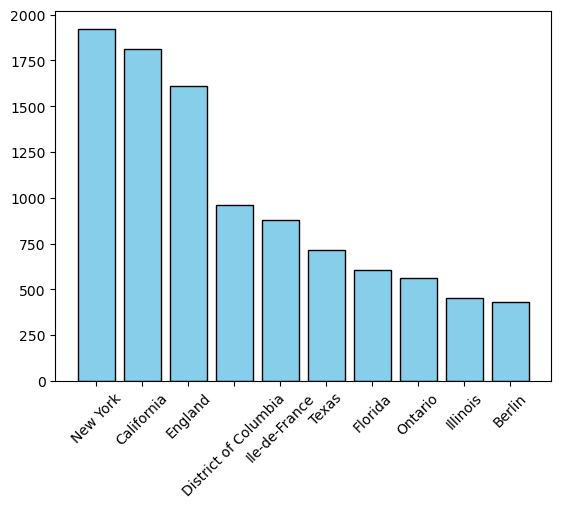

In [44]:
#barplot for state
desired_values = ['New York','California','England','District of Columbia','Ile-de-France','Texas','Florida','Ontario','Illinois','Berlin']
plt.bar(desired_values,height = sorted_series.head(10),edgecolor = 'black', color = 'skyblue' )
plt.xticks(rotation=45)

## idea is that I create a column with categorical variables with different ranges( 5000>x>1000) and then colour code the barplot to find out which states contribute to the highest like count.

(array([1.8775e+04, 7.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  513.5, 1027. , 1540.5, 2054. , 2567.5, 3081. , 3594.5,
        4108. , 4621.5, 5135. ]),
 <BarContainer object of 10 artists>)

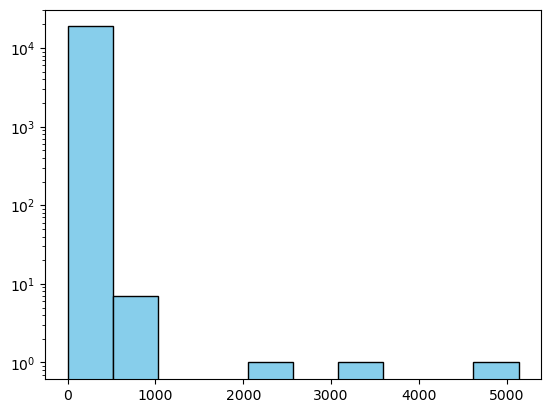

In [27]:
plt.hist(df_cleaned['retweet_count'], log = True, edgecolor = 'black', color = 'skyblue')


In [39]:
conditions = [(df_cleaned['likes'] >= 0) & (df_cleaned['likes'] <= 5000),
    (df_cleaned['likes'] > 5000) & (df_cleaned['likes'] <= 10000),(df_cleaned['likes'] > 10000) & (df_cleaned['likes'] <= 20000)]
values = ['0-5000', '5000-10000','10000-20000']

df_cleaned['like_categories'] = np.select(conditions,values, default ='other')





C:\Users\User\AppData\Local\Temp\ipykernel_7580\3068205388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['like_categories'] = np.select(conditions,values, default ='other')


818751    other
245075    other
Name: like_categories, dtype: object

In [46]:
sns.barplot(x=desired_values, y=sorted_series.head(10), hue=df_cleaned['like_categories'], palette='viridis')

KeyError: 'New York'